# PUI final exam 2020

## Theoretic part

## Question 1. 
Imagine training a model that considers multiple street segments and aims to predict the traffic based on the known characteristics of the street segments. Some of the street segments from the training sample have the observed amount of traffic specified for them, others do not. How would you classify this problem from the Machine Learning perspective?

A. Supervised learning;

B. Unsupervised learning;

C. Semi-supervised learning;

D. Reinforcement learning.

Explain your choice:

## Ans C. Semisupervised learning
For supervised learning, the model needs to be input with labels for train value in order to achieve correct predictions.
For unsupervised learning the model needs to be without labels to find patterns or clusters within the data.
Since for this problem, we have a mixture of labelled and unlabelled data a semi-supervised approach should be considered 
to optimize the model. The training data would consist of labeled and unlabeled data in the characteristics of street segments
For reinforced learning, the model needs to interact with the environment to provide rewards or penalty factors,
that is non existant for the above mentioned problem.

## Question 2. 
Regression $y\sim a_1 x_1 + a_2 x_2 +a_3 x_3$ have p-value of $0.03$ for $x_1$, $0.3$ for $x_2$ and $0.15$ for $x_3$. Does it mean that (select all that apply):

A. Impact of $x_3$ is twice stronger than impact of $x_2$.

B. Regressors $x_2$ and $x_3$ are irrelevant.

C. One could reject the null-hypothesis $a_j=0$ only for $j=1$ but not for $j=2$ and $j=3$ at 95% singificance level.

D. The estimated value of $a_1$ is statistically significant.

E. 95%-confidence indervals for $a_2$ and $a_3$ should contain zero. 

## Ans C,D and E
For the p-value of x1=0.03, we could reject the null hypothesis that a1=0 at 95% confidence intervals and conclude that value of a1 is statistically significant. The p-values for 𝑥2 and 𝑥3 are both greater than 0.05. This means that we cannot reject the null hypothesis 𝑎2=0 or 𝑎3=0 at the 95% significance level. The effect of x2 and x3 are not completely irrelevant on Y variable but is statiscally not significant at 95% interval.
The p value does not indicate the strength of the regressor on the Y variable, so its difficult to conclude whether the impact of x3 is twice as strong as impact of x2.
The 95% confidence intervals for a2 and a3 must contain 0 as we cannot reject the null hypothesis of a2 =0 and a3=0 at 95% confidence interval


## Question 3. 
Which of the following statements (select all that apply) are true about overfitting problem for linear regression:

A. Overfitting problem could be detected by R-squared if the in-sample R-squared
is very low.

B. Overfitting problem often happens when we do not have enough features but a big
number of observations.

C. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is very low.

D. Overfitting problem could happen when we have many noisy features but a
small number of observations.

E. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is considerably lower compared to in-sample R-squared.

Explain how do you understand the concept of overfitting in general and in the context of your answer.

## Ans C, D and E
R square values are measures of how well a model fits the data. This ranges from 0-1. The lower the value of r squared means the model underperforms on the data and higher the value, better the fit.

If the in sample R squared is very low, this means there could be a lot of noise and the model doesnt predict the trend. It might not necessarily mean overfitting. On the other hand if the R squared value for the out of sample is very low, this could mean that the model fits well for the training data and does not perform on the new data. This becomes a case of overfitting the model on the test set. Overfitting is less likely to occur when there is more number of observations and features, as it has more data to learn from. When there are more noisy features and small number of observations the model tries to fit according to the noise and doesnt predict the overall trend of the observations. That is a case of overfitting as well. 

When the R squared values for out of sample are considerably lower than the same for in sample the model is fitting welll to the training set but not predicting good for the unseen data. 

## Question 4. 
You trained the regression model with 100 regressors and 1000 observations in the training and another 1000 in the test sample. You found that in-sample R2 over the training sample is 70\% and the out-of-sample R2 over the test sample only - 30\%. 

a) Do you think there is any problem and how would you characterize it? Can adding more regressors (if you have them) help the model?

b) Which approaches you may use to solve the problem? 

c) What would you expect the in-sample R2 to increase or decrease after that applying suggested approaches from step b)? What about the out-of-sample (test) R2?

## a)
There is a problem of overfitting with the model as the out of sample Rsquared is significantly lower than the insample Rsquared. Adding more regressors may or may not help help the model depending on the level of noise and correlation of the regressors. 

## b)
1.Spliting the data into several folds can help us with an idea of how the model performs on each fold. This process is called cross validation. 
2.We can also train the model for a certain number of iterations and stop whe the out of sample error increases.This can help the model without it overfitting. 
3.Adding a penalty term and reducing the complexity of the model with L1 and L2 regularization can also prevent overfitting
4.Removal of features that do not contribute to the predictions of the model can be implemented to get better results.

## c)
The in-sample R2 is expected to decrease and the out of sample R2 is expected to increase after the implementation of the above mentioned techniques. The aim is to decrease the difference between the R2 values of in sample and out of sample values.

In [1]:
# import packages
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# Traffic Modeling for Real-Time Autonomous Vehicle Solutions in LGA

Transportation network models are essential to transportation operations and planning. A simple yet well-designed linear model can provide us insights into the traffic demand. We are going to model the outgoing traffic around LGA, one of the busiest transportation hubs in NYC. 
In this test, you'll be asked to:
* Find possible correlations from observations
* Incorporate time patterns using dummy variables
* Run and diagnose linear models, in-sample and out-of-sample. Perform feature selection
* Cluster the days based on their ridership patterns to see if we can detect any outliers

We will be importing the dataset `LGAVehicleByHour.csv`,`LGAFlightArrival` providing FHV and taxi ridership and arrivals at the airport aggregated on the hourly basis:
* `vehicle_count`: Number of FHV (For Hire Vehicle) and taxi departing from LGA. This is our target variable.
* `arrivals`: Number of incoming domestic flights arriving LGA, which is assumed to provide a basis for future FHV and taxi demand

In [2]:
# import and curate the dataset
TaxiRidership = pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LGAVehicleByHour.csv")
FlightArrival = pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LGAFlightArrival.csv")

In [3]:
TaxiRidership.head()

,DOLocationID,Date,vehicle_count
0,1,2018-01-01 00:00,0.0
1,2,2018-01-01 00:00,0.0
2,3,2018-01-01 00:00,0.0
3,4,2018-01-01 00:00,0.0
4,5,2018-01-01 00:00,0.0


In [4]:
FlightArrival.head()

,Date,arrivals
0,18/1/1 0:00,3
1,18/1/1 1:00,0
2,18/1/1 2:00,1
3,18/1/1 3:00,0
4,18/1/1 4:00,0


In [5]:
# convert the `date` feature into `dt.datetime` format. This is for later creating dummy variables
TaxiRidership.Date = pd.to_datetime(TaxiRidership.Date)
FlightArrival.Date = pd.to_datetime(FlightArrival.Date, format='%y/%m/%d %H:%M')

In [6]:
#get day of the week; monday - 0, sunday - 6
TaxiRidership['DOW']=pd.DatetimeIndex(TaxiRidership.Date).weekday

In [7]:
#get day from beginning of the year, hour and day of the week from datetime
TaxiRidership['Hour']=pd.DatetimeIndex(TaxiRidership.Date).hour

In [8]:
#get day from beginning of the year
TaxiRidership['day']=((TaxiRidership.Date-dt.datetime(2018,1,1))/dt.timedelta(days = 1)).astype(int)

## Task 1. Spatial visualization

### Q1. Spatial distribution of total ridership from LGA on each day of week. Using colormap 'RdBu_r', bonus on if you plot 7 plots on the same colormap scale.

In [9]:
TaxiRidership

,DOLocationID,Date,vehicle_count,DOW,Hour,day
0,1,2018-01-01 00:00:00,0.0,0,0,0
1,2,2018-01-01 00:00:00,0.0,0,0,0
2,3,2018-01-01 00:00:00,0.0,0,0,0
3,4,2018-01-01 00:00:00,0.0,0,0,0
4,5,2018-01-01 00:00:00,0.0,0,0,0
...,...,...,...,...,...,...
2251315,259,2018-12-31 23:00:00,2.0,0,23,364
2251316,260,2018-12-31 23:00:00,3.0,0,23,364
2251317,261,2018-12-31 23:00:00,1.0,0,23,364
2251318,262,2018-12-31 23:00:00,8.0,0,23,364


In [10]:
taxi = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
taxi

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,Brooklyn,256.0,256.0,0.000169,0.067915,Williamsburg (South Side),"POLYGON ((-73.95834 40.71331, -73.95681 40.712..."
259,Bronx,259.0,259.0,0.000395,0.126750,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
260,Queens,260.0,260.0,0.000422,0.133514,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
261,Manhattan,261.0,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."


In [11]:
Taxi_Viz1= TaxiRidership.groupby(['DOW','DOLocationID']).agg({'vehicle_count':'sum'}).reset_index()
Taxi_Viz1.rename(columns={'DOLocationID':'location_i'}, inplace=True) 
Taxi_Viz1

,DOW,location_i,vehicle_count
0,0,1,1049.0
1,0,2,0.0
2,0,3,462.0
3,0,4,2411.0
4,0,5,18.0
...,...,...,...
1794,6,259,655.0
1795,6,260,3293.0
1796,6,261,7769.0
1797,6,262,9728.0


In [12]:
taxi_sd = pd.merge(taxi,Taxi_Viz1,how='right', on='location_i') 
taxi_sd.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,DOW,vehicle_count
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",0,1049.0
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",0,0.0
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",0,462.0
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",0,2411.0
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",0,18.0


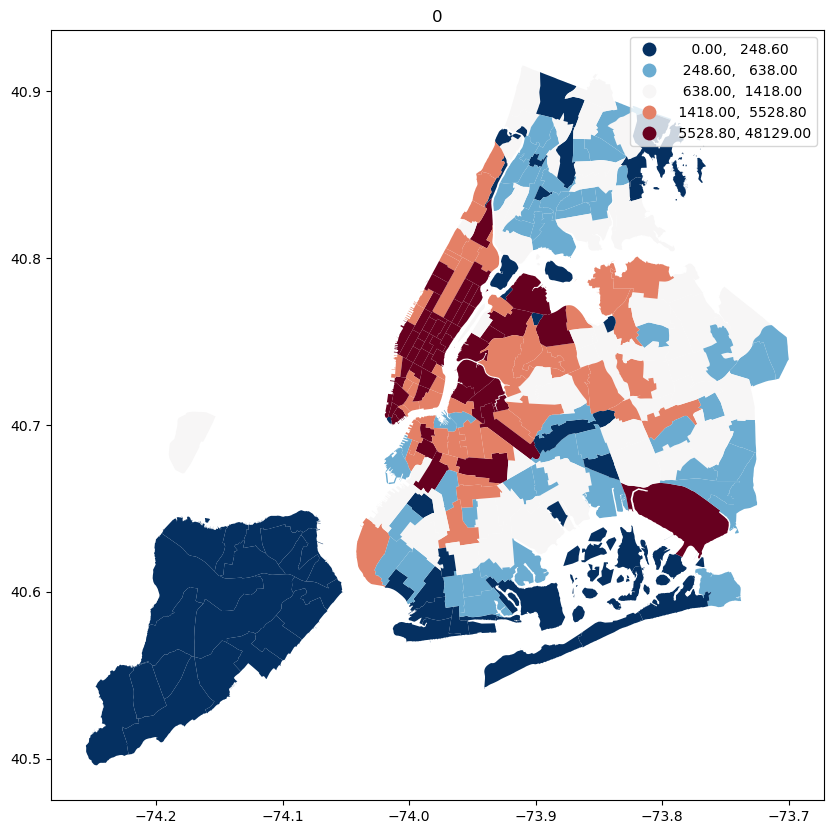

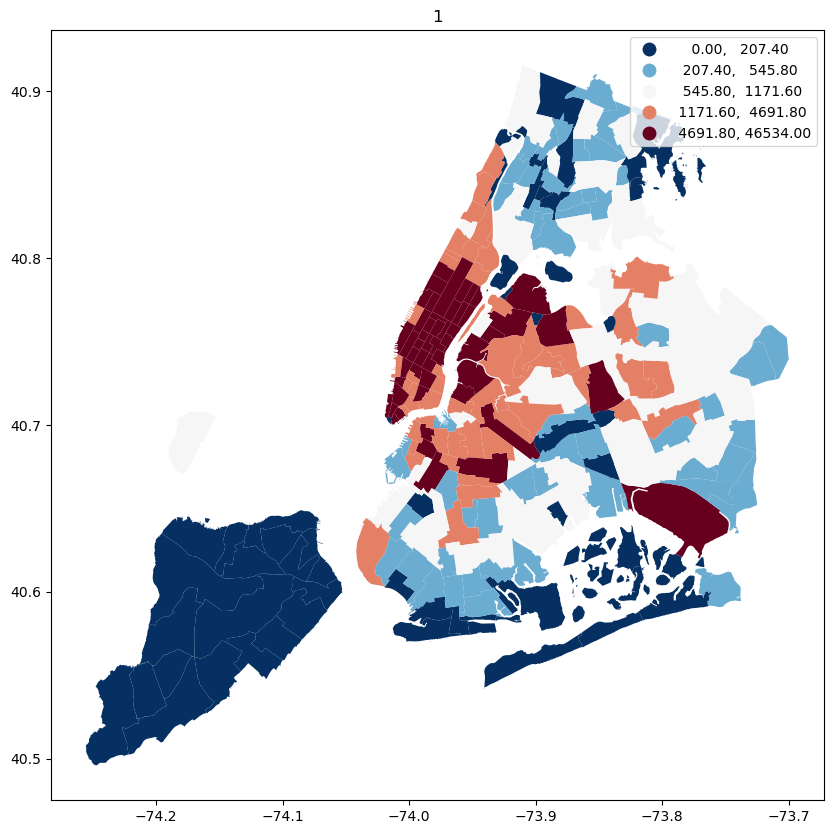

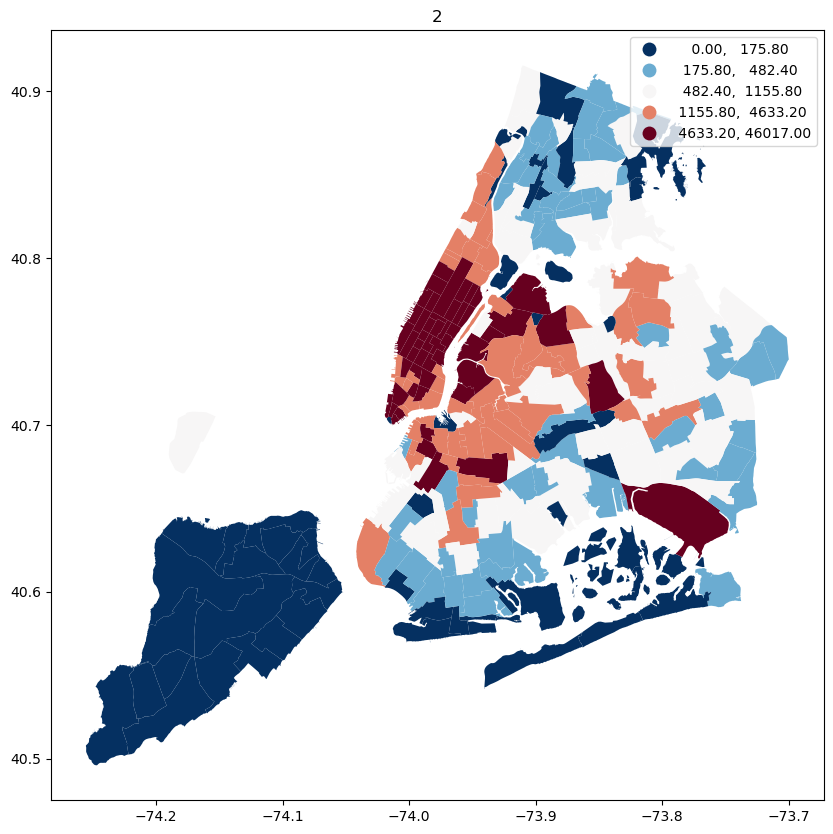

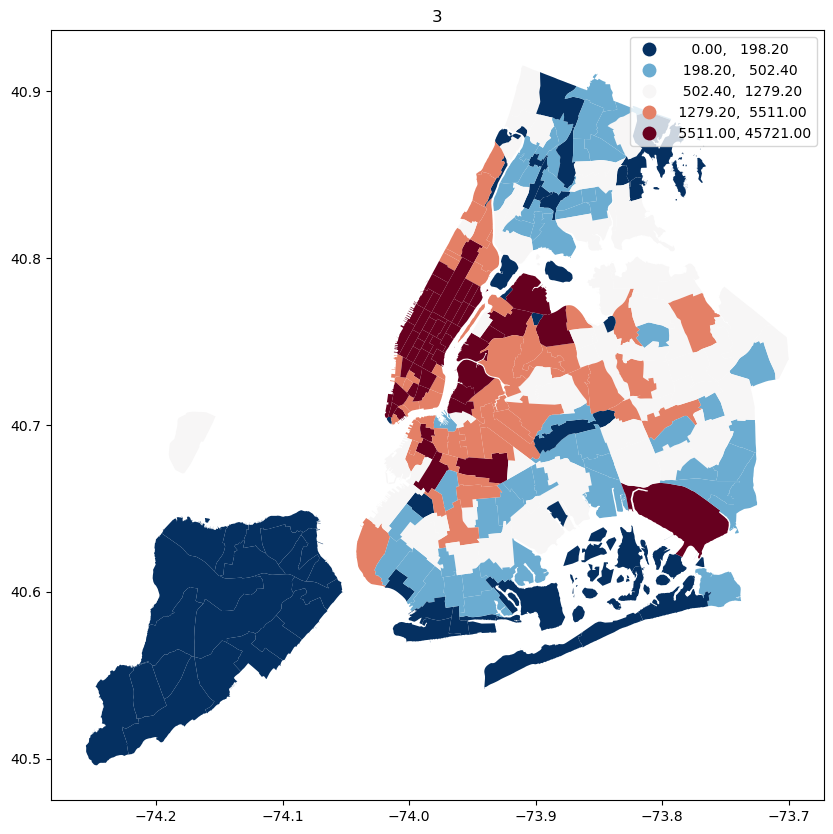

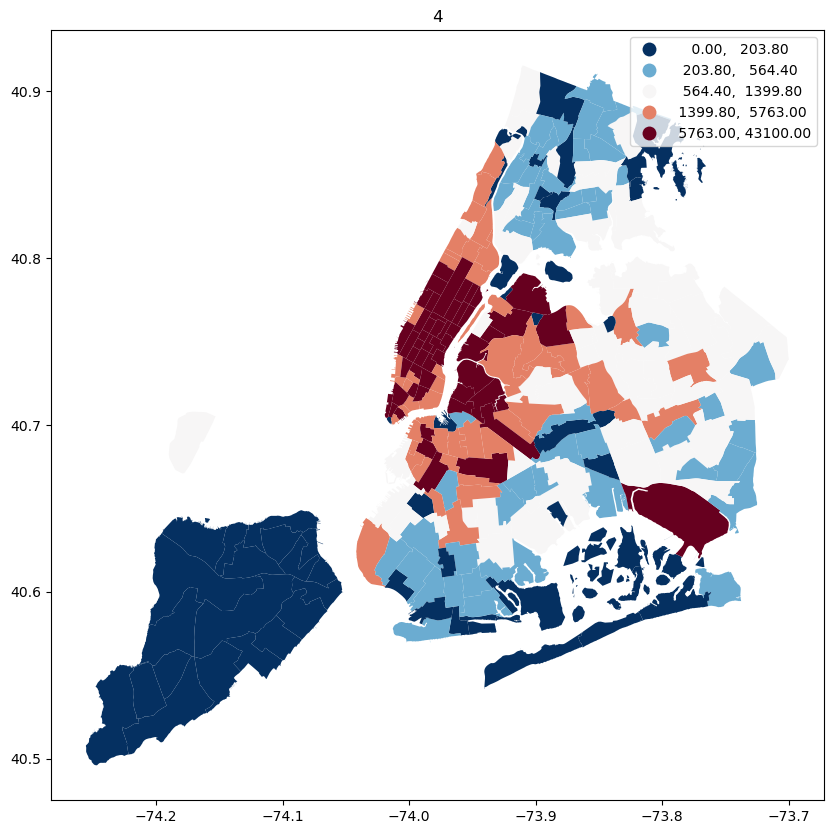

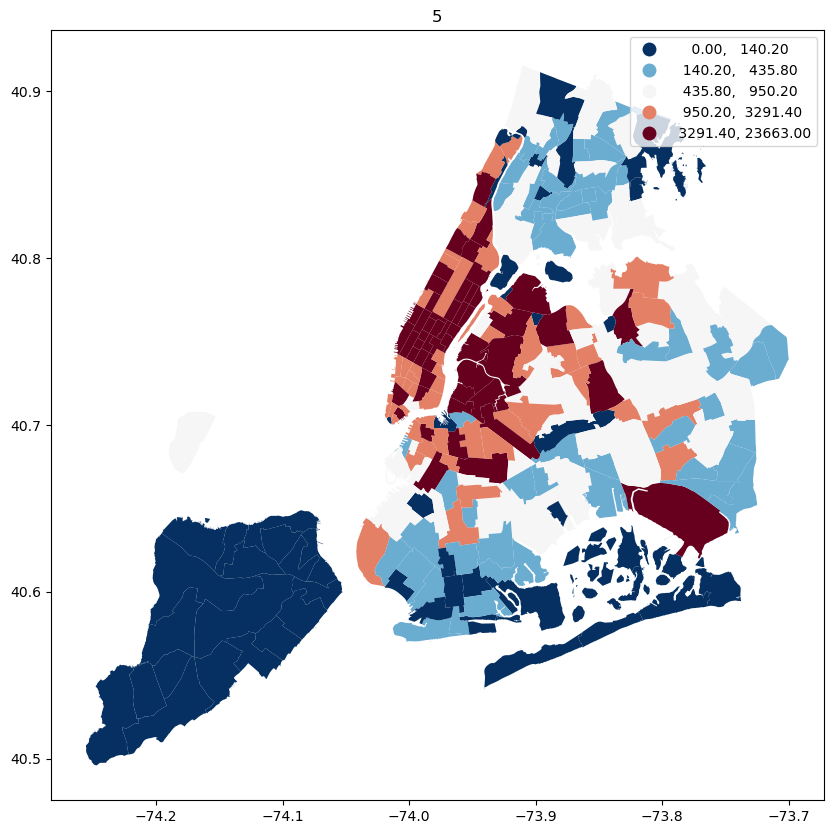

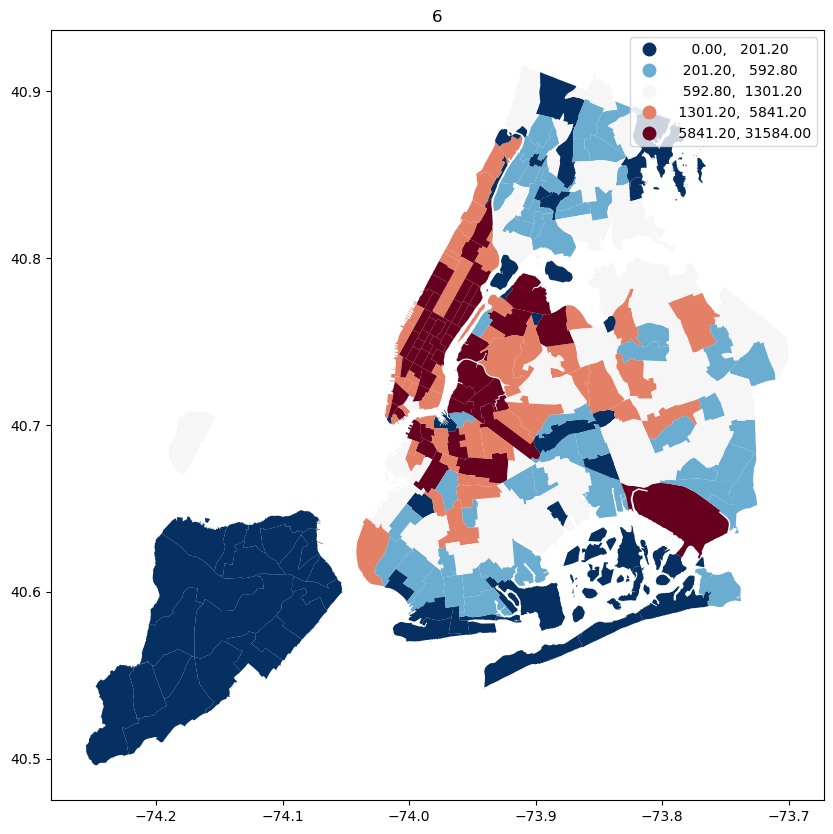

In [13]:
for day in taxi_sd.DOW.unique():
    df = taxi_sd.loc[taxi_sd['DOW']==day]
    df.plot(figsize=(10,10), column='vehicle_count',cmap='RdBu_r',scheme="quantiles", 
         legend=True)
    plt.title(day)

## Task 2: Data preprocessing

### Q1. aggregate ridership to date-hour level (over the entire city for all the drop off locations aggregated together), merge with the flight arrival data
Hint: you may need to precess data format in two datasets before merge.

In [14]:
# example of taxi ridership date-hour level aggregation output
Taxi_T2 = TaxiRidership[['Date','vehicle_count']].groupby(['Date'], as_index=False).sum()
Taxi_T2

,Date,vehicle_count
0,2018-01-01 00:00:00,142.0
1,2018-01-01 01:00:00,23.0
2,2018-01-01 02:00:00,2.0
3,2018-01-01 03:00:00,1.0
4,2018-01-01 04:00:00,13.0
...,...,...
8755,2018-12-31 19:00:00,467.0
8756,2018-12-31 20:00:00,599.0
8757,2018-12-31 21:00:00,384.0
8758,2018-12-31 22:00:00,410.0


In [15]:
T2_merged = pd.merge(Taxi_T2, FlightArrival, on = 'Date')
T2_merged

,Date,vehicle_count,arrivals
0,2018-01-01 00:00:00,142.0,3
1,2018-01-01 01:00:00,23.0,0
2,2018-01-01 02:00:00,2.0,1
3,2018-01-01 03:00:00,1.0,0
4,2018-01-01 04:00:00,13.0,0
...,...,...,...
8755,2018-12-31 19:00:00,467.0,11
8756,2018-12-31 20:00:00,599.0,13
8757,2018-12-31 21:00:00,384.0,8
8758,2018-12-31 22:00:00,410.0,8


### Q2. add time-lagged arrivals (1,2,3,4,5,6..12 hours before)

Taxi and FHV ridership volume is impacted by flight arrivals. Intuitively, more flights bring more passengers, and more ridership eventually. However, the hourly ridership volume may not only be related to flight arrivals in the same hour, arrivals 1 hour, 2 hours ago could impact ridership as well, as travelers need some time to pass the costume or wait for luggage. Please add lag of `arrivals` as additional features, and name new features as `lag1` for `arrivals` 1 hour ago, and `lag2` for 2 hours before and so on. You may use the `shift` function in pandas to add arrivals lag values. For example, df['arrivals'].shift(1) means adding 1 hour lag value of arrivals. `iloc` function works as well.

In [16]:
# example of dataset after added 12 lag arrivals features
for i in range(1,13):
    T2_merged['lag{}'.format(i)]= T2_merged['arrivals'].shift(i)

In [17]:
T2_merged.head(20)

,Date,vehicle_count,arrivals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
0,2018-01-01 00:00:00,142.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 01:00:00,23.0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 02:00:00,2.0,1,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 03:00:00,1.0,0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 04:00:00,13.0,0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-01-01 05:00:00,13.0,0,0.0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-01-01 06:00:00,15.0,0,0.0,0.0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-01-01 07:00:00,46.0,5,0.0,0.0,0.0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
8,2018-01-01 08:00:00,248.0,14,5.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN
9,2018-01-01 09:00:00,443.0,15,14.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,NaN,NaN,NaN


## Task 3. Data Exploration

### Q1. Print some dataset characteristics: number of records, the total number of FHV and taxi trips, total number of arriving flights


In [18]:
print('No. of records=',len(T2_merged))
print('The total number of FHV and taxi trips=',sum(T2_merged['vehicle_count']))
print('Total number of arriving flights=',sum(T2_merged['arrivals']))

No. of records= 8760
The total number of FHV and taxi trips= 5430922.0
Total number of arriving flights= 163713


### Q2. Plot a probability distribution function of hourly ridership volume on weekdays and weekend, and apply t-test to check is there a significant difference of hourly ridership between each day of week and the rest of the days, $\alpha=0.05$ Report hypothesis testing result in a $7\times1$ table, index name should be day of week (e.g. Monday), values should be True or False (True for P < 0.05).
Hint: You may use norm.pdf function in scipy.stats to calculate the probability distribution, and standardize at first.

In [19]:
Taxi_T2['Day']= Taxi_T2['Date'].dt.dayofweek
Taxi_T2['Day'].value_counts()

0    1272
1    1248
2    1248
3    1248
4    1248
5    1248
6    1248
Name: Day, dtype: int64

In [20]:
from sklearn import preprocessing

In [21]:
Taxi_T2_weekday=Taxi_T2.loc[Taxi_T2['Day']<=4]
Taxi_T2_weekend=Taxi_T2.loc[Taxi_T2['Day']>4]

In [22]:
Taxi_T2_weekday['Normalized_w1'] = (Taxi_T2_weekday['vehicle_count'] - np.mean(Taxi_T2_weekday['vehicle_count']))/np.std(Taxi_T2_weekday['vehicle_count'])
Taxi_T2_weekend['Normalized_w2'] = (Taxi_T2_weekend['vehicle_count'] - np.mean(Taxi_T2_weekend['vehicle_count']))/np.std(Taxi_T2_weekend['vehicle_count'])

<function matplotlib.pyplot.show(close=None, block=None)>

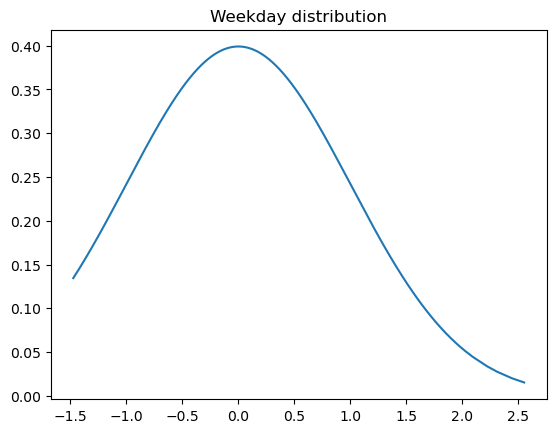

In [23]:
Taxi_T2_weekday.sort_values(by='vehicle_count', inplace =True)
plt.plot(Taxi_T2_weekday['Normalized_w1'],stats.norm.pdf(Taxi_T2_weekday['Normalized_w1']))
plt.title('Weekday distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

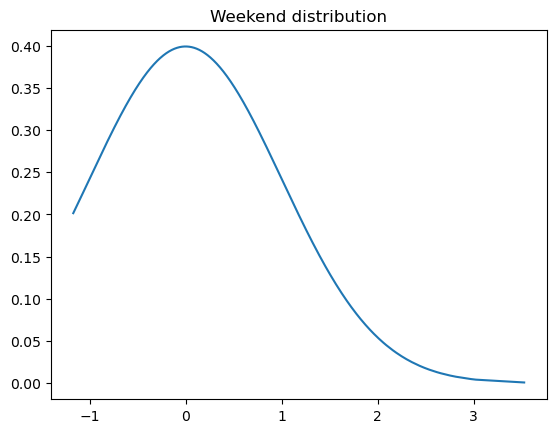

In [24]:
Taxi_T2_weekend.sort_values(by='vehicle_count', inplace =True)
plt.plot(Taxi_T2_weekend['Normalized_w2'],stats.norm.pdf(Taxi_T2_weekend['Normalized_w2']))
plt.title('Weekend distribution')
plt.show

In [25]:
Taxi_T2['Normalized'] = (Taxi_T2['vehicle_count'] - np.mean(Taxi_T2['vehicle_count']))/np.std(Taxi_T2['vehicle_count'])

In [26]:
pvalues = []
for day in range(7):
    pvalue = stats.ttest_ind(Taxi_T2.loc[Taxi_T2['Day']==day]['Normalized'],
                             Taxi_T2.loc[Taxi_T2['Day']!=day]['Normalized']).pvalue
    pvalues.append(pvalue)

In [27]:
pvalues

[5.2698478741066256e-17,
 0.1694463092394252,
 0.8410123295392996,
 2.7418635128922033e-08,
 0.0001340000217808487,
 1.2644011492226913e-97,
 0.1822251807495392]

In [28]:
TF=[i<0.05 for i in pvalues]
TF=pd.DataFrame(TF)
Days_O = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday','Sunday']
TF.rename(columns ={0 :'True/False'}, index= lambda x : Days_O[x], inplace = True)
TF

,True/False
Monday,True
Tuesday,False
Wednesday,False
Thursday,True
Friday,True
Saturday,True
Sunday,False


### Q3 .  Plot the timeline of the `vehicle_count` and `arrivals` for the month having the highest taxi ridership (the sum of vehicle count in the whole month). As `arrivals` and `vehicle_count` have different scales, standardize each dataset first.

In [29]:
T2_merged['Normalized_taxi'] =(T2_merged['vehicle_count'] - np.mean(T2_merged['vehicle_count']))/np.std(T2_merged['vehicle_count'])
T2_merged['Normalized_arri'] =(T2_merged['arrivals'] - np.mean(T2_merged['arrivals']))/np.std(T2_merged['arrivals'])
T2_merged.head()

,Date,vehicle_count,arrivals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,Normalized_taxi,Normalized_arri
0,2018-01-01 00:00:00,142.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.057812,-1.176818
1,2018-01-01 01:00:00,23.0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.321176,-1.401849
2,2018-01-01 02:00:00,2.0,1,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.367652,-1.326839
3,2018-01-01 03:00:00,1.0,0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.369865,-1.401849
4,2018-01-01 04:00:00,13.0,0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.343307,-1.401849


In [30]:
T3 = T2_merged[['Date','vehicle_count','arrivals','Normalized_taxi','Normalized_arri']]

In [31]:
T3['Month'] = pd.DatetimeIndex(T3.Date).month
T3_month = T3[['Month','arrivals','vehicle_count']].groupby(['Month'], as_index=False).sum()
T3_month

,Month,arrivals,vehicle_count
0,1,12757,383576.0
1,2,12463,368534.0
2,3,13131,419679.0
3,4,13840,455743.0
4,5,14297,497572.0
5,6,14312,479624.0
6,7,13904,439348.0
7,8,14259,468856.0
8,9,13433,456470.0
9,10,14585,507190.0


Text(0, 0.5, 'Standardized Value')

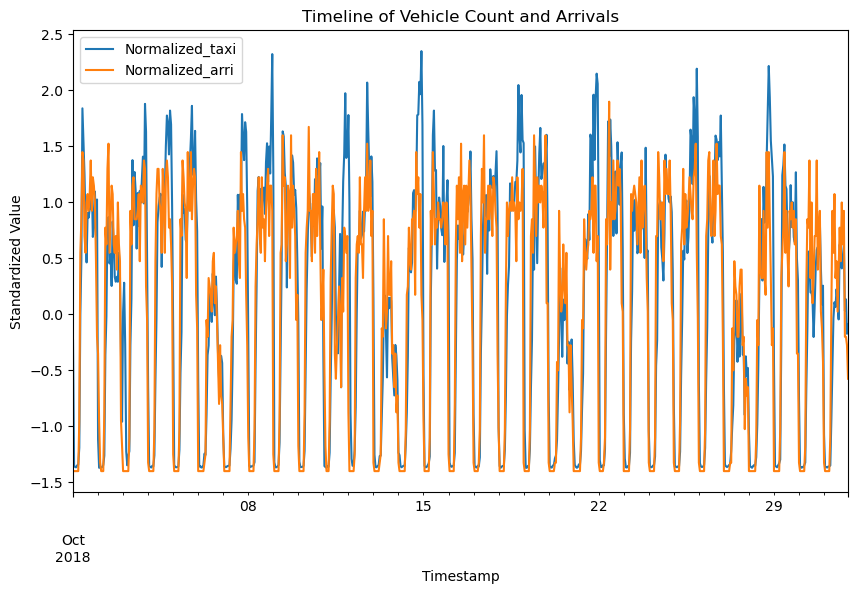

In [32]:
T3_viz = T3.loc[T3['Month']==10]
T3_viz.plot(x='Date', y=['Normalized_taxi','Normalized_arri'],figsize=(10,6), title='Timeline of Vehicle Count and Arrivals')
plt.xlabel('Timestamp')
plt.ylabel('Standardized Value')

## Task 4: Build Linear Regression Model of FHV and taxi ridership vs Arrivals data

### Q1. split the data into training, validation and test samples (first 90 days for training, next 180 for validation, last 90 for test)


In [33]:
T2_merged = T2_merged.iloc[:,0:15]
T2_merged['Day']= ((T2_merged.Date-dt.datetime(2018,1,1))/dt.timedelta(days = 1)).astype(int)
T2_merged.head()

,Date,vehicle_count,arrivals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,Day
0,2018-01-01 00:00:00,142.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2018-01-01 01:00:00,23.0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2018-01-01 02:00:00,2.0,1,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2018-01-01 03:00:00,1.0,0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2018-01-01 04:00:00,13.0,0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [35]:
df_Train=T2_merged.loc[T2_merged['Day']<=89] 
df_Valid=T2_merged.loc[(T2_merged['Day']>89)&(T2_merged['Day']<=269)]
df_Test=T2_merged.loc[T2_merged['Day']>269]

### Q2.  Build an OLS model 

Build an OLS model with intercept (you may want to use smf.ols) over the training dataset using `arrivals` as a sole predictor for `vehicle_count`. Check p-value for `arrivals`. What does it indicate? Report the 99% confidence interval for arrivals's coefficient. Scatter plot for ridership and flight arrival, include the predictive line.

In [36]:
lm = smf.ols(formula='vehicle_count~arrivals', data = df_Train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     5657.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:54:04   Log-Likelihood:                -14690.
No. Observations:                2160   AIC:                         2.938e+04
Df Residuals:                    2158   BIC:                         2.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.8315      7.772      9.757      0.0

In [37]:
print(lm.pvalues)

Intercept    4.869764e-22
arrivals     0.000000e+00
dtype: float64


arrivals has a p value lower than 0.05 therefore it is statistically significant and corelated not by chance

In [38]:
lm.conf_int(alpha=0.01)

,0,1
Intercept,55.794760,95.868142
arrivals,25.382394,27.184322


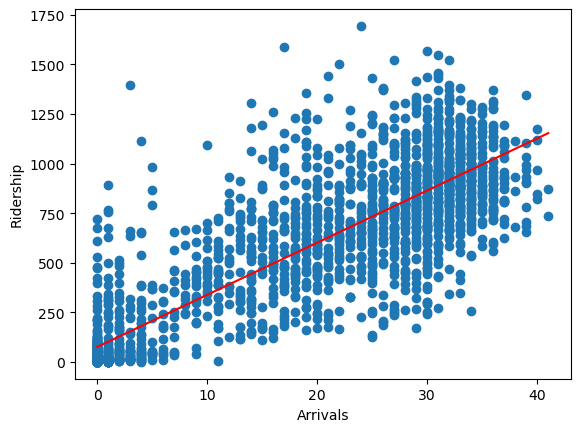

In [39]:
ridership = df_Train['vehicle_count']
arrivals = df_Train['arrivals']

plt.scatter(arrivals, ridership)

x = np.linspace(arrivals.min(), arrivals.max(), 100)
y = lm.params['Intercept'] + lm.params['arrivals'] * x
plt.plot(x, y, 'r')

plt.xlabel('Arrivals')
plt.ylabel('Ridership')
plt.show()

### Q3. Consider Impact of immediate history of arrivals
by adding time lags - add all 12 lag variables into the regression above

There is always some delay between passengers arrival and departure (e.g. passing customs, picking up luggage, etc). `vehicle_count` might be more related to historical values of flight arrivals (lag) rather than immediate `arrivals`. Engineer a formula with all the following variables and run the regression:
* arrival, lag1, ..., lagN: that happens 1hr, ..., N=12 hr ahead.
Which of the variables have a statistically significant impact according to p-values?

In [40]:
formula = 'vehicle_count ~ arrivals + lag1 + lag2 + lag3 + lag4 + lag5 + lag6 + lag7 + lag8 + lag9 + lag10 + lag11 + lag12'
lm2 = smf.ols(formula= formula, data = df_Train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1001.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:54:04   Log-Likelihood:                -13884.
No. Observations:                2148   AIC:                         2.780e+04
Df Residuals:                    2134   BIC:                         2.788e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.5959      9.574     -5.598      0.0

In [41]:
TF2 = lm2.pvalues<= 0.05
TF2

Intercept     True
arrivals      True
lag1          True
lag2          True
lag3          True
lag4         False
lag5         False
lag6         False
lag7         False
lag8         False
lag9          True
lag10        False
lag11        False
lag12        False
dtype: bool

arrivals,lag1,lag2,lag3,lag9 have a statistically significant impact.

### Q4: Incorporate Temporal Patterns 

adding categorical variables for day of week and hour of the day.

From the visualization in task1Q3, you may see that both - taxi ridership as well as arrivals follow a somewhat periodic temporal pattern. Intuitively, this is true for most traffic flows following daily rhythms including rush hours, and also varying over the course of the week. Usually, we add dummy/categorical variables (Boolean variable: 1 for True and 0 for False) to encapsulate people's traveling patterns during different time periods.

Note that it would not make sense to add hour and dow as regular regressors as we can't anticipate their linear numeric impact. Instead, the expression `C(.)` or `pd.get_dummies` could be used in the regression formulae in order to treat those variables as categorical adding corresponding dummy variables to account for their possible discrete values. 

Perform the regression of `vehicle_count` ridership against `arrivals`, lags, and temporal categorical variables.

In [42]:
df_Train['DOW']=pd.DatetimeIndex(df_Train.Date).weekday
df_Train['Hour']=pd.DatetimeIndex(df_Train.Date).hour

df_Train.drop(columns = 'Day', axis =1, inplace= True)
df_Train.head()

,Date,vehicle_count,arrivals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,DOW,Hour
0,2018-01-01 00:00:00,142.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,2018-01-01 01:00:00,23.0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,2018-01-01 02:00:00,2.0,1,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
3,2018-01-01 03:00:00,1.0,0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
4,2018-01-01 04:00:00,13.0,0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4


In [43]:
temp_train = pd.get_dummies(df_Train, columns=['DOW','Hour'])
columns=temp_train.columns[2:]
formula='vehicle_count~arrivals+'+'+'.join([i for i in columns]); formula
lm3 = smf.ols(formula=formula, data = temp_train).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:54:05   Log-Likelihood:                -13522.
No. Observations:                2148   AIC:                         2.713e+04
Df Residuals:                    2105   BIC:                         2.737e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.7069      9.394      4.972      0.0

### Q5. Perform feature selection for lag variables
As you may see not all the lag variables have a statistically significant impact on the regression. Maybe some of them are not really relevant?
Try different amounts of lag variables m=0,1,...,12 (include m most recent arrival volumes/lags) using a loop for training the above regression over the training sample, report and plot the out-of-sample R2 over the validation sample as the function of m and pick the m which maximizes it. Evaluate the final regression over the test sample.

In [44]:
df_Valid["Hour"]=pd.DatetimeIndex(df_Valid.Date).hour
df_Test["Hour"]=pd.DatetimeIndex(df_Test.Date).hour

df_Valid.drop(columns = 'Day', axis =1, inplace= True)
df_Test.drop(columns = 'Day', axis =1, inplace= True)

df_Valid['DOW']=pd.DatetimeIndex(df_Valid.Date).weekday
df_Test['DOW']=pd.DatetimeIndex(df_Test.Date).weekday

df_Valid = pd.get_dummies(df_Valid, columns=['DOW','Hour'])
df_Test = pd.get_dummies(df_Test, columns=['DOW','Hour'])

In [45]:
temp_train.columns

Index(['Date', 'vehicle_count', 'arrivals', 'lag1', 'lag2', 'lag3', 'lag4',
       'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12',
       'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'Hour_0',
       'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23'],
      dtype='object')

In [46]:
lags = ['lag' + str(i) for i in range(1, 13)]
other_vars = temp_train.columns[15:]
formulas = ['vehicle_count ~ arrivals + ' + ' + '.join(lags[:M]) + ' + ' + ' + '.join(other_vars) for M in range(1, 13)]
lms = [smf.ols(formula=formula, data=temp_train).fit() for formula in formulas]
validation_r2s = [1 - ((lm.predict(df_Valid) - df_Valid.vehicle_count)**2).sum() / ((df_Valid.vehicle_count - df_Valid.vehicle_count.mean())**2).sum() for lm in lms]
lag_df = pd.DataFrame({'M': range(1, 13), 'Validation R2': validation_r2s})


In [47]:
lag_df

,M,Validation R2
0,1,0.854221
1,2,0.855935
2,3,0.855076
3,4,0.855039
4,5,0.854844
5,6,0.854841
6,7,0.854936
7,8,0.855171
8,9,0.855849
9,10,0.855505


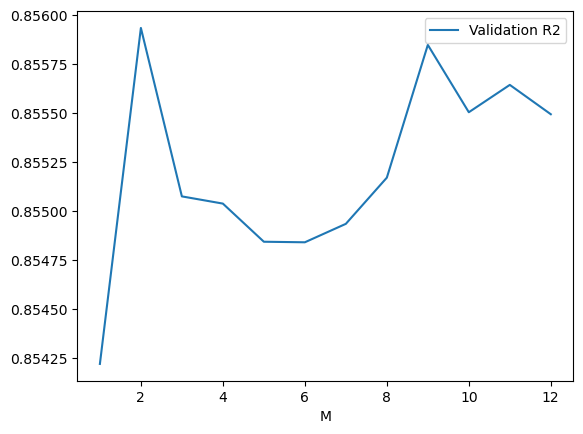

In [48]:
lag_df.plot.line(x='M', y='Validation R2')
plt.show()

Lag1 + Lag2 shows the highest jump in R2 values

In [50]:
formula='vehicle_count~arrivals+lag1+lag2+' + '+'.join(temp_train[temp_train.columns[15:]])
lm_max = smf.ols(formula=formula, data = temp_train).fit()

In [51]:
df_Test['ypred']=lm_max.predict(df_Test)
TestR2=1-((df_Test.ypred-df_Test.vehicle_count)**2).sum()/((df_Test.vehicle_count-df_Test.vehicle_count.mean())**2).sum()
TestR2

0.8216004589634407

### Q6. Visualize temporal patterns and lag impacts through bar plots
For the best regression above visualize:
- bar plot of hour vs its impact (slope coefficient)
- bar plot of day of the week vs its impact coefficient
- bar plot of the lag (0 for immediate arrivals, 1,2,... for lags)

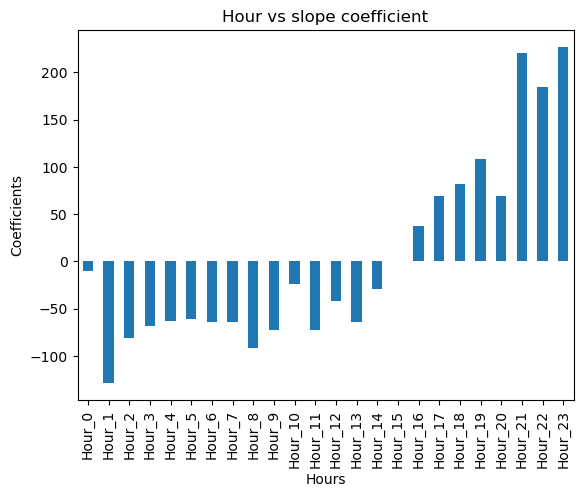

In [54]:
df_hour=pd.DataFrame(lm_max.params[11:])
df_hour.columns=['Coefficients']

df_hour['Coefficients'].plot(kind="bar")
plt.xlabel("Hours")
plt.ylabel("Coefficients")
plt.title("Hour vs slope coefficient")
plt.show()

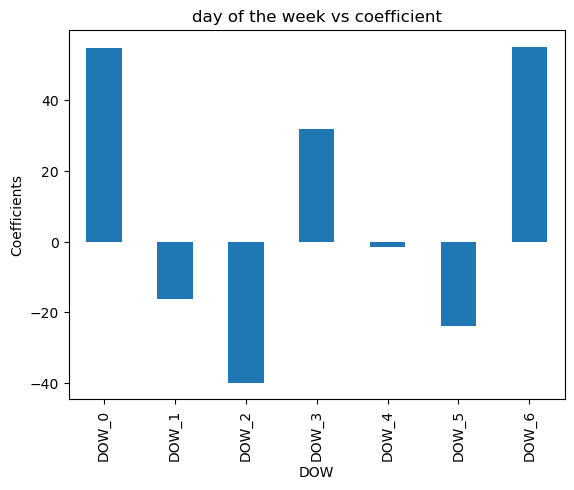

In [56]:
df_DOW=pd.DataFrame(lm_max.params[4:11])
df_DOW.columns=['Coefficients']
df_DOW['Coefficients'].plot(kind="bar")
plt.xlabel("DOW")
plt.ylabel("Coefficients")
plt.title("day of the week vs coefficient")
plt.show()

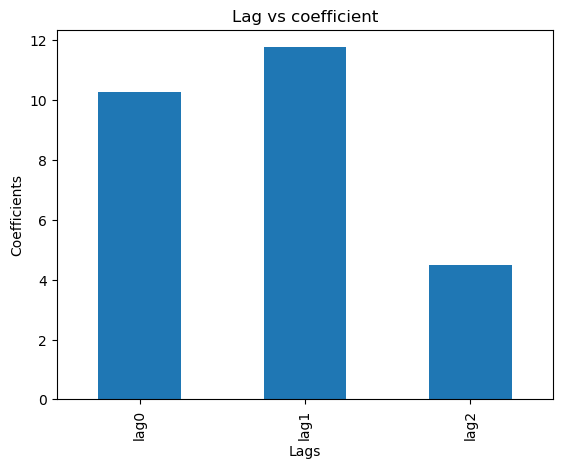

In [57]:
df_lag=pd.DataFrame(lm_max.params[1:4])
df_lag.columns=['Coefficients']
df_lag.rename(index={'arrivals': 'lag0'},inplace=True)
df_lag['Coefficients'].plot(kind="bar")
plt.xlabel("Lags")
plt.ylabel("Coefficients")
plt.title("Lag vs coefficient")
plt.show()

## Task 5. Cluster the days of the year based on the relative timeline of their FHV and taxi departures from the airport

### Q1. From the entire `dataset`, create a dataframe with days as rows, hours as columns, and ridership as values (feel free to use pd.pivot_table). Normalize each row by the total daily ridership

In [58]:
TaxiRidership = pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LGAVehicleByHour.csv")
TaxiRidership.Date = pd.to_datetime(TaxiRidership.Date)

TaxiRidership['Hour'] = TaxiRidership['Date'].dt.hour
TaxiRidership['Date'] = TaxiRidership['Date'].dt.date
TaxiRidership.head()

,DOLocationID,Date,vehicle_count,Hour
0,1,2018-01-01,0.0,0
1,2,2018-01-01,0.0,0
2,3,2018-01-01,0.0,0
3,4,2018-01-01,0.0,0
4,5,2018-01-01,0.0,0


In [59]:
T5=TaxiRidership.pivot_table(index='Date',columns='Hour',values='vehicle_count',aggfunc='sum')
T5=T5.div(T5.sum(axis=1), axis=0)
T5.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.011312,0.001832,0.000159,0.000080,0.001036,0.001036,0.001195,0.003664,0.019756,0.035290,...,0.060942,0.068908,0.061818,0.094161,0.064048,0.060942,0.059269,0.081654,0.095276,0.085956
2018-01-02,0.053023,0.003352,0.001877,0.000134,0.000335,0.001073,0.001609,0.020177,0.036868,0.074876,...,0.059794,0.043572,0.054967,0.062140,0.065625,0.063011,0.054364,0.070251,0.069312,0.049269
2018-01-03,0.055675,0.025525,0.001982,0.000248,0.000661,0.000991,0.003635,0.014538,0.043863,0.064183,...,0.057823,0.056831,0.074922,0.083512,0.071948,0.058896,0.041880,0.039650,0.046754,0.024864
2018-01-04,0.248316,0.009259,0.001684,0.000842,0.008418,0.012626,0.036195,0.026094,0.026936,0.024411,...,0.057239,0.067340,0.033670,0.037879,0.024411,0.023569,0.017677,0.026936,0.031145,0.060606
2018-01-05,0.033489,0.014192,0.002510,0.001298,0.000606,0.001211,0.003115,0.007961,0.007702,0.020076,...,0.051142,0.058757,0.062565,0.076411,0.076324,0.082208,0.077362,0.091295,0.065853,0.082814


### Q2. Try K-means with different numbers of clusters k=2..7, report average Silhouette score for each. Which k is the "optimal" from Silhouette's standpoint?

In [60]:
range_n_clusters = range(2,8)
for n_clusters in range_n_clusters: 
    km = KMeans(n_clusters=n_clusters, random_state=999)
    cluster_labels = km.fit_predict(T5)
    silhouette_avg = silhouette_score(T5, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.18866291040607697
For n_clusters =3, the average silhouette_score is :0.22324051576230952
For n_clusters =4, the average silhouette_score is :0.233987849415495
For n_clusters =5, the average silhouette_score is :0.2202733509167496
For n_clusters =6, the average silhouette_score is :0.18351772552624057
For n_clusters =7, the average silhouette_score is :0.1695430625693194


n=4 has the maximum silhouette score

### Q3. Perform K-means with the optimal k from above. Report the number of occurrences of each day of the week within each of the clusters. How would you interpret the clusters based on that? 
Hint: Create a dictionary of the cluster numbers corresponding to each day of the year, apply it adding a column "cluster" to the dataframe, and use pivot table with aggregation function `count` to collect the numbers above. 

In [61]:
km = KMeans(n_clusters=4,random_state=999)
cluster_labels = km.fit_predict(T5)
T5['Cluster'] = cluster_labels
T5['Cluster'].unique()

array([2, 0, 3, 1])

In [63]:
T5.reset_index(inplace=True)
T5["DOW"]=pd.DatetimeIndex(T5.Date).weekday

T5_DOW=T5.pivot_table(index='DOW',columns='Cluster',values='Date',aggfunc='count',fill_value=0)
T5_DOW.rename(index={0: 'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'},inplace=True)
T5_DOW

Cluster,0,1,2,3
DOW,,,,
Monday,37,7,6,3
Tuesday,42,6,4,0
Wednesday,41,5,4,2
Thursday,31,6,14,1
Friday,34,11,5,2
Saturday,2,9,1,40
Sunday,3,0,49,0


Cluster 0 has most number of weekday occurences, cluster 1 has few of weekday and weekend occurences
Cluster 2 and Cluster 3 has mostly weekend occurences specially saturday and sunday in each

### Q4 visualize the hourly timeline for each cluster, and normalize by total riderships in the cluster.
Hint: Use the pivot table to collect total riders per hour of the day within each cluster for visualization (after appropriate normalization by the grand total).

In [64]:
T5_hour=TaxiRidership.pivot_table(index='Date',columns='Hour',values='vehicle_count',aggfunc='sum',fill_value=0)
T5_hour['Cluster']=cluster_labels

N=[]
for i in range(4):
    df=T5_hour[T5_hour['Cluster']==i]
    df.drop('Cluster',axis=1,inplace=True)
    df = df.sum(axis=0)
    N.append(df)

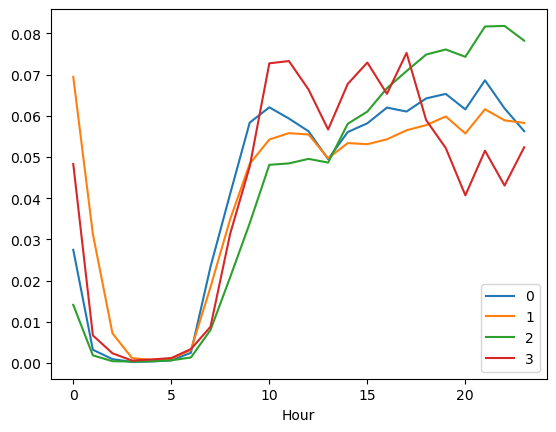

In [65]:
T5_hour=pd.DataFrame(N)

T5_hour = T5_hour.div(T5_hour.sum(axis=1), axis=0)
df=T5_hour.transpose()
df.plot()
plt.show()